# Image Processing With Machine Learning
Date: 13 December 2019
Course: Convolutional Neural Netwroks for Image Processing 


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <br> **مقدمه ای بر تصویر**
        <br> اول یه سری از تصویر صحبت می کنیم. که تصویر چیست. نگران نباش سعی می کنم خیلی کوتاه باشه.
    </font>
    </div>

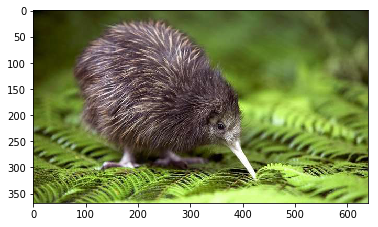

In [36]:
import matplotlib.pyplot as plt
kiwi = plt.imread('photos/kiwi.jpg')
cassowary = plt.imread('photos/cassowary.jpg')
angry_bird = plt.imread('photos/Northern-Cardinal.jpg')
plt.imshow(kiwi)
plt.show()

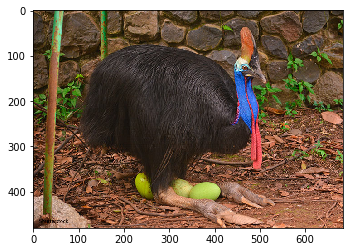

In [37]:
plt.imshow(cassowary)
plt.show()

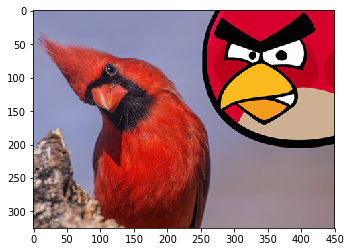

In [34]:
plt.imshow(angry_bird)
plt.show()

In [3]:
kiwi.shape

(368, 640, 3)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <br> در واقع یه تصویر رنگی، سه تا ماتریس روی سر هم هست که به هر کدوم میگیم یه چنل. 
        <br> چنل قرمز (0) ، چنل سبز (1) و چنل آبی (2) 
        <br>  می تونیم هر چنل رو جداگانه نگاه کنیم
    </font>
    </div>

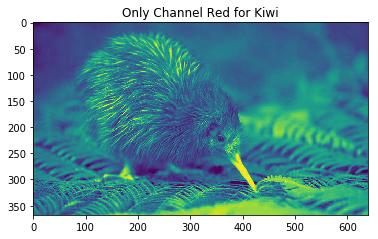

In [40]:
plt.imshow(kiwi[:,:,0])
plt.title('Only Channel Red for Kiwi')
plt.show()


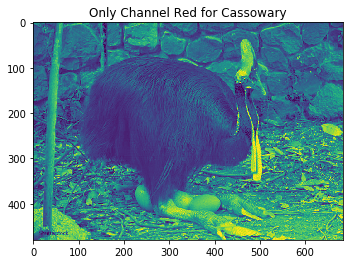

In [38]:
plt.imshow(cassowary[:,:,0])
plt.title('Only Channel Red for Cassowary')
plt.show()

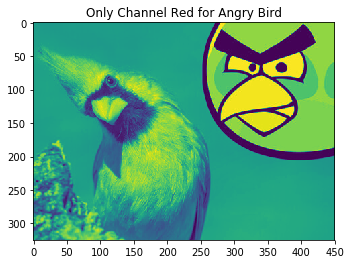

In [39]:
plt.imshow(angry_bird[:,:,0])
plt.title('Only Channel Red for Angry Bird')
plt.show()